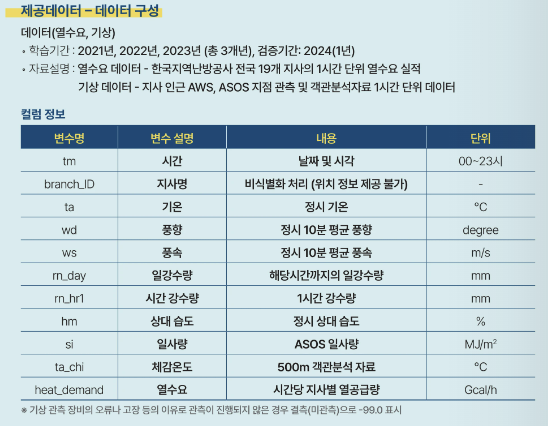

## 패키지 & 데이터 로드

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install missingno
import missingno

In [74]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


In [89]:
heat = pd.read_csv("../data/train_heat.csv", index_col=0)
heat.head()

train_heat.tm train_heat.branch_id  train_heat.ta  train_heat.wd  \
1     2021010101                    A          -10.1           78.3   
2     2021010102                    A          -10.2           71.9   
3     2021010103                    A          -10.0          360.0   
4     2021010104                    A           -9.3          155.9   
5     2021010105                    A           -9.0           74.3   

   train_heat.ws  train_heat.rn_day  train_heat.rn_hr1  train_heat.hm  \
1            0.5                0.0                0.0           68.2   
2            0.6                0.0                0.0           69.9   
3            0.0                0.0                0.0           69.2   
4            0.5                0.0                0.0           65.0   
5            1.9                0.0                0.0           63.5   

   train_heat.si  train_heat.ta_chi  train_heat.heat_demand  
1          -99.0               -8.2                     281  
2          -99.0               -8.6                     262  
3          -99.0               -8.8                     266  
4          -99.0               -8.9                     285  
5          -99.0               -9.2                     283

In [90]:
# 컬럼명에서 train_heat. 제거
heat.columns = heat.columns.str.replace("train_heat.", "", regex=False)
heat.head(2)

tm branch_id    ta    wd   ws  rn_day  rn_hr1    hm    si  ta_chi  \
1  2021010101         A -10.1  78.3  0.5     0.0     0.0  68.2 -99.0    -8.2   
2  2021010102         A -10.2  71.9  0.6     0.0     0.0  69.9 -99.0    -8.6   

   heat_demand  
1          281  
2          262

In [77]:
heat.shape
# 499301개의 데이터, 11개의 feature

(499301, 11)

In [78]:
heat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499301 entries, 1 to 499301
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   tm           499301 non-null  int64  
 1   branch_id    499301 non-null  object 
 2   ta           499301 non-null  float64
 3   wd           499301 non-null  float64
 4   ws           499301 non-null  float64
 5   rn_day       499301 non-null  float64
 6   rn_hr1       499301 non-null  float64
 7   hm           499301 non-null  float64
 8   si           499301 non-null  float64
 9   ta_chi       499301 non-null  float64
 10  heat_demand  499301 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 45.7+ MB


In [91]:
# 날짜 데이터를 데이트타임으로 변경
heat['tm'] = pd.to_datetime(heat['tm'].astype(str), format="%Y%m%d%H")

In [87]:
heat['tm'] # 2021-01-01부터 2023-12-31까지의 데이터

1        2021-01-01 01:00:00
2        2021-01-01 02:00:00
3        2021-01-01 03:00:00
4        2021-01-01 04:00:00
5        2021-01-01 05:00:00
                 ...        
499297   2023-12-31 19:00:00
499298   2023-12-31 20:00:00
499299   2023-12-31 21:00:00
499300   2023-12-31 22:00:00
499301   2023-12-31 23:00:00
Name: tm, Length: 499301, dtype: datetime64[ns]

In [93]:
heat['year'] = heat['tm'].dt.year
heat['month'] = heat['tm'].dt.month
heat['day'] = heat['tm'].dt.day
heat['hour'] = heat['tm'].dt.hour

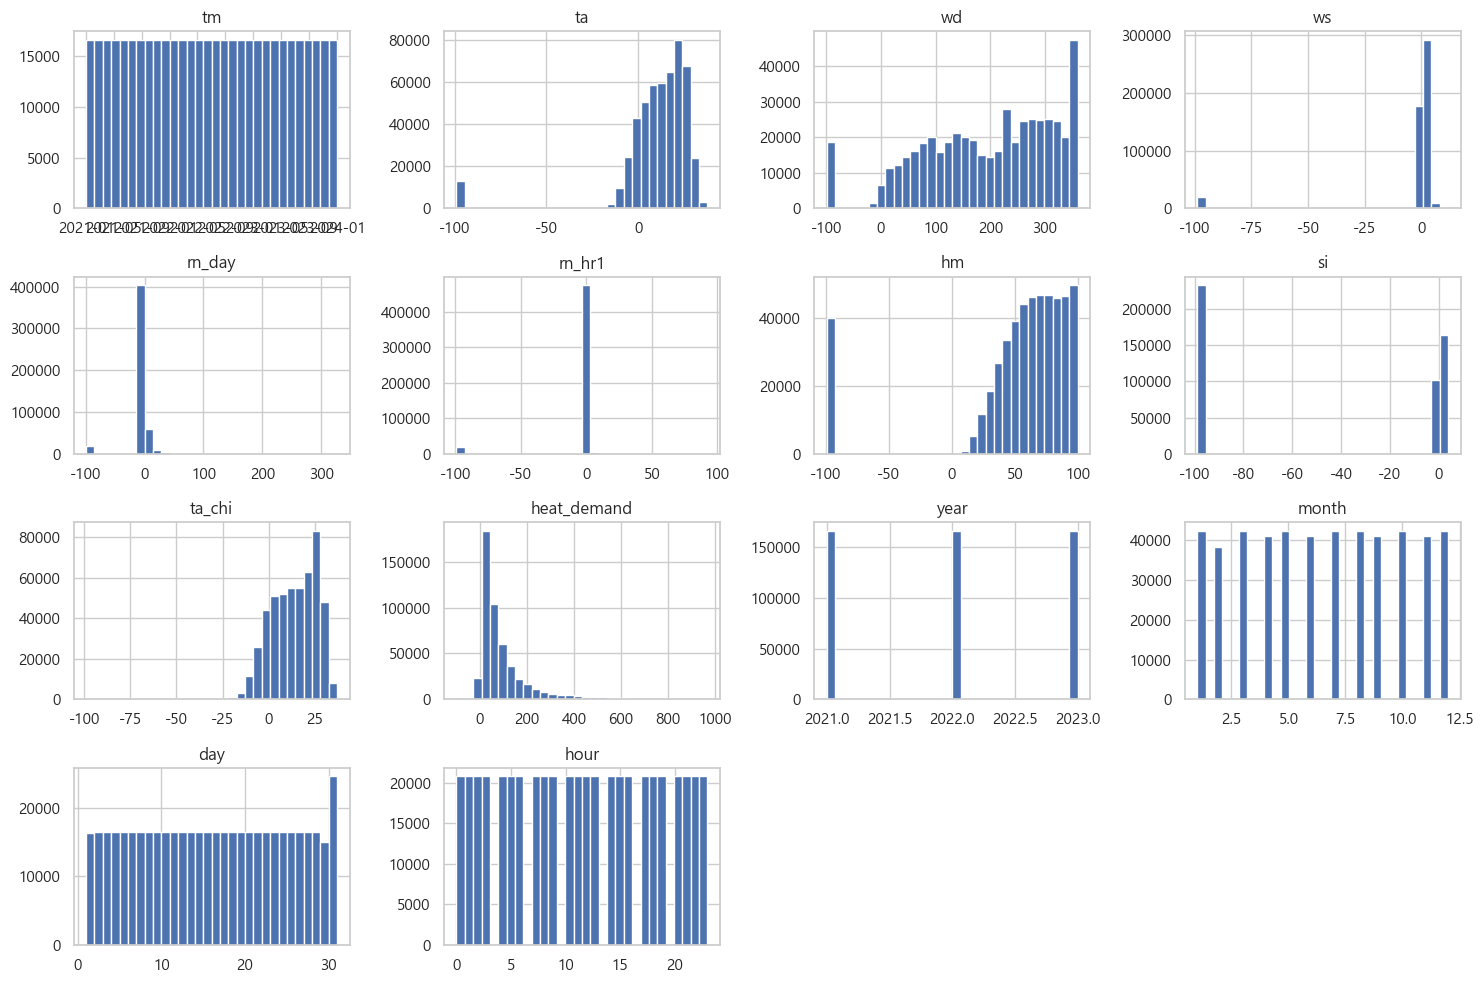

In [94]:
heat.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

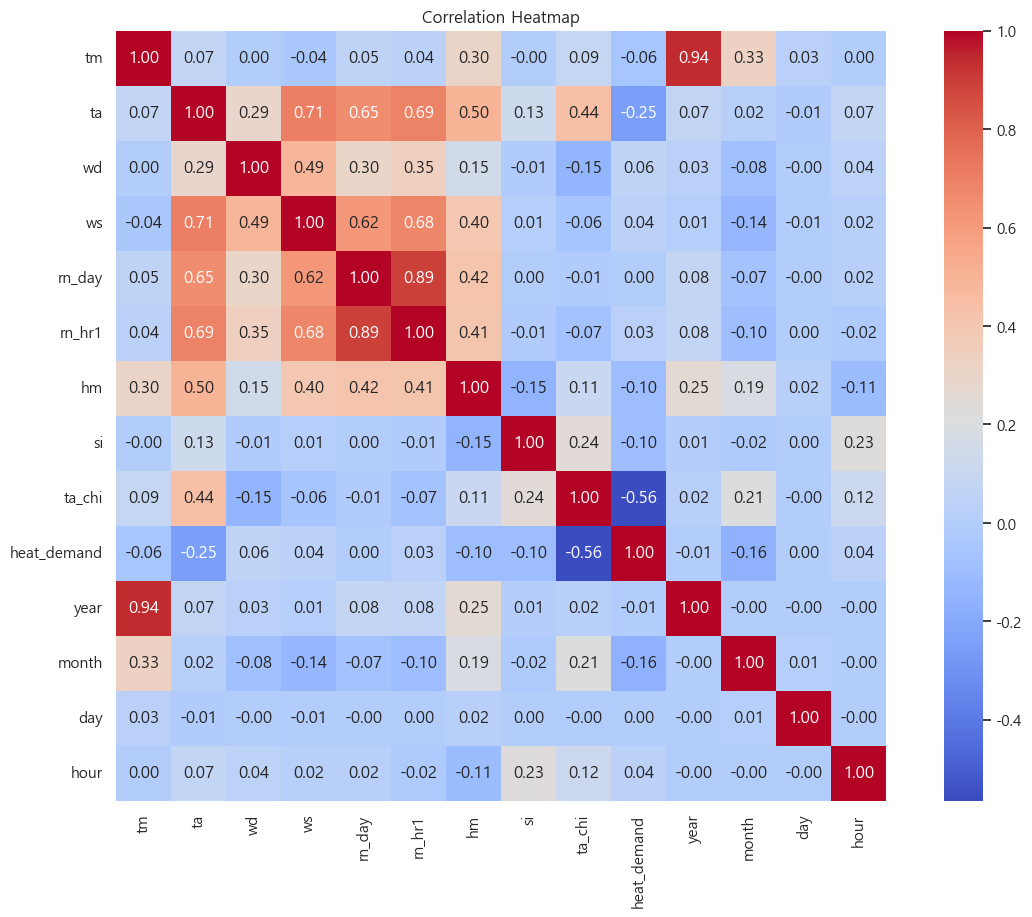

In [95]:
corr = heat.drop('branch_id',axis=1).corr()
plt.figure(figsize=(15, 10))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.show()

## 결측치 확인
- -99로 저장되어 있음

In [96]:
len(heat[heat.isin([-99]).any(axis=1)])
# 263069개의 결측치 -> na로 대체할래

263069

In [97]:
heat = heat.replace(-99, np.nan)

In [98]:
heat.isnull().sum()

tm                  0
branch_id           0
ta              12997
wd              18815
ws              18815
rn_day          18626
rn_hr1          19154
hm              39717
si             232922
ta_chi             20
heat_demand        23
year                0
month               0
day                 0
hour                0
dtype: int64

In [99]:
# 비율로 확인
heat.isnull().mean()

tm             0.000000
branch_id      0.000000
ta             0.026030
wd             0.037683
ws             0.037683
rn_day         0.037304
rn_hr1         0.038362
hm             0.079545
si             0.466496
ta_chi         0.000040
heat_demand    0.000046
year           0.000000
month          0.000000
day            0.000000
hour           0.000000
dtype: float64

- si에 유난히 결측치 많음!!

<Axes: >

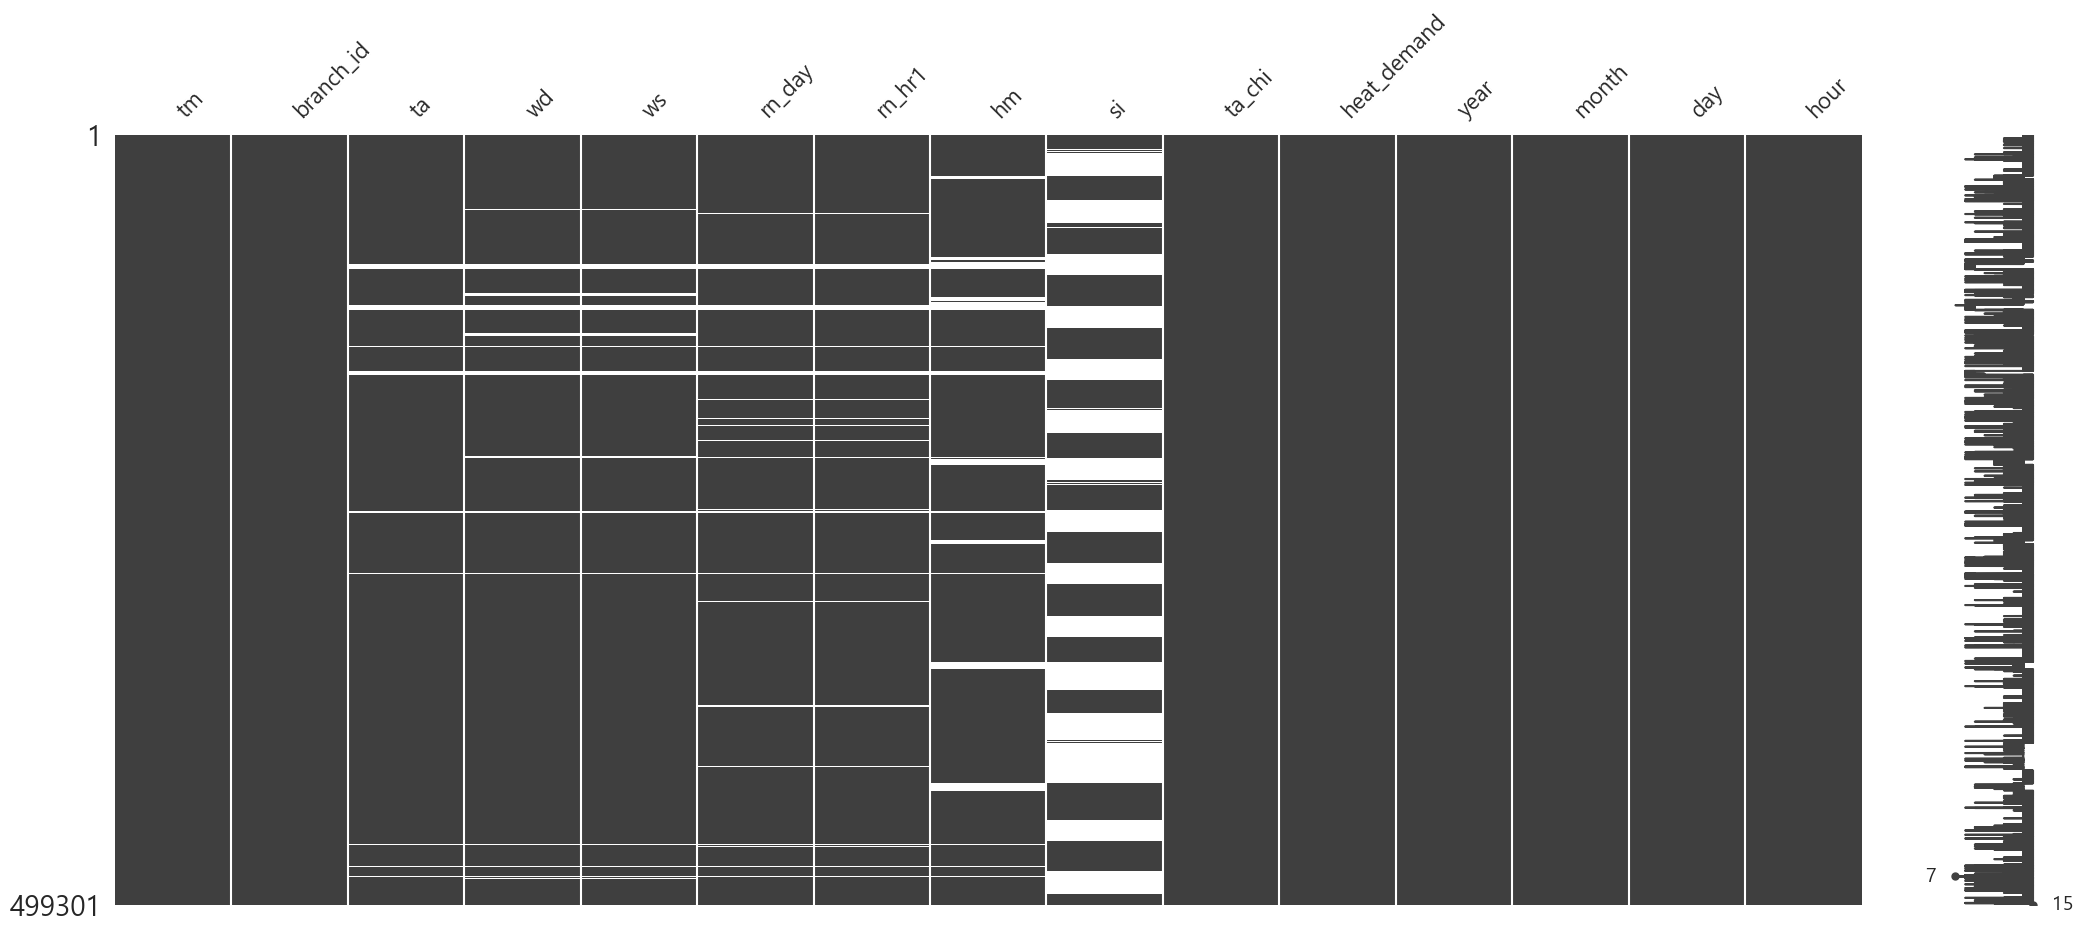

In [100]:
# 시각화로 확인
missingno.matrix(heat)

## Target 값 확인

In [102]:
heat[heat['heat_demand'].isnull()]

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
12080  2022-05-19 08:00:00         A  18.5  148.3  1.5     0.0     0.0  52.9   
20945  2023-05-23 17:00:00         A  25.2  277.5  1.7     0.0     0.0  30.2   
100529 2023-06-23 20:00:00         D  27.8  264.6  0.7     0.0     0.0  66.6   
100530 2023-06-23 21:00:00         D  26.5  360.0  0.0     0.0     0.0  71.4   
107013 2021-03-21 01:00:00         E   7.3  275.6  0.9     0.0     0.0   NaN   
108335 2021-05-15 03:00:00         E  21.2  160.3  1.0     0.0     0.0   NaN   
108336 2021-05-15 04:00:00         E  20.8  360.0  0.0     0.0     0.0   NaN   
108337 2021-05-15 05:00:00         E  20.3  154.5  0.9     0.0     0.0   NaN   
110397 2021-08-09 01:00:00         E   NaN    NaN  NaN     NaN     NaN   NaN   
116862 2022-05-05 10:00:00         E  22.6  142.0  2.1     0.0     0.0  22.2   
116863 2022-05-05 11:00:00         E  23.6  171.8  2.0     0.0     0.0  24.8   
116884 2022-05-06 08:00:00         E  18.3  135.2  0.2     0.0     0.0  72.3   
118249 2022-07-02 05:00:00         E  24.9  360.0  0.0     0.0     0.0  88.2   
137857 2021-09-27 06:00:00         F  17.1   47.3  0.2     0.0     0.0  81.4   
261688 2023-11-16 01:00:00         J   2.3  360.0  0.0     0.0     0.0  95.2   
261712 2023-11-17 01:00:00         J   5.2  307.1  0.5     0.0     0.0  98.5   
269251 2021-09-27 05:00:00         K  18.7  212.0  0.4     0.0     0.0  65.6   
316861 2021-03-05 01:00:00         M   9.3   46.8  4.4     1.4     1.4  95.0   
390880 2023-08-16 06:00:00         O  25.2   60.6  2.2     0.0     0.0  72.8   
480429 2021-11-05 15:00:00         S  20.5   39.2  1.4     0.0     0.0  33.8   
480463 2021-11-07 01:00:00         S   9.8  360.0  0.0     0.0     0.0  84.7   
480799 2021-11-21 01:00:00         S   NaN    NaN  NaN     NaN     NaN   NaN   
495504 2023-07-26 18:00:00         S  25.7  349.7  1.6    12.5     5.5  98.7   

          si  ta_chi  heat_demand  year  month  day  hour  
12080   0.97    19.4          NaN  2022      5   19     8  
20945   2.14    24.7          NaN  2023      5   23    17  
100529  0.11    27.8          NaN  2023      6   23    20  
100530   NaN    26.7          NaN  2023      6   23    21  
107013   NaN     6.9          NaN  2021      3   21     1  
108335   NaN    22.3          NaN  2021      5   15     3  
108336   NaN    22.1          NaN  2021      5   15     4  
108337   NaN    21.8          NaN  2021      5   15     5  
110397   NaN    25.5          NaN  2021      8    9     1  
116862  2.50    20.1          NaN  2022      5    5    10  
116863  2.99    21.5          NaN  2022      5    5    11  
116884  0.85    18.8          NaN  2022      5    6     8  
118249   NaN    26.4          NaN  2022      7    2     5  
137857   NaN    20.3          NaN  2021      9   27     6  
261688   NaN     4.6          NaN  2023     11   16     1  
261712   NaN     5.4          NaN  2023     11   17     1  
269251   NaN    19.6          NaN  2021      9   27     5  
316861   NaN     6.9          NaN  2021      3    5     1  
390880  0.00    27.0          NaN  2023      8   16     6  
480429  1.53    19.5          NaN  2021     11    5    15  
480463   NaN     8.9          NaN  2021     11    7     1  
480799   NaN     6.2          NaN  2021     11   21     1  
495504  1.12    28.9          NaN  2023      7   26    18

- 이 중에 일단 12080 부터 보겠음
    - heat_demend에만 결측치 존재
    - 결측치 처리 방법 생각
        - 1. 앞 뒤 1~2개 평균내기
        - 2. 전날 다음날 같은 시각 데이터 가져오기
        - 3. 1번 2번 합치기

In [106]:
heat.iloc[12080-3:12080+2, :]


tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
12078 2022-05-19 06:00:00         A  15.0  105.2  0.9     0.0     0.0  71.0   
12079 2022-05-19 07:00:00         A  16.2  139.2  0.7     0.0     0.0  67.5   
12080 2022-05-19 08:00:00         A  18.5  148.3  1.5     0.0     0.0  52.9   
12081 2022-05-19 09:00:00         A  20.2  162.8  2.2     0.0     0.0  46.5   
12082 2022-05-19 10:00:00         A  22.1  168.6  1.9     0.0     0.0  43.2   

         si  ta_chi  heat_demand  year  month  day  hour  
12078  0.04    17.4         18.0  2022      5   19     6  
12079  0.41    18.1         33.0  2022      5   19     7  
12080  0.97    19.4          NaN  2022      5   19     8  
12081  1.78    20.7         44.0  2022      5   19     9  
12082  2.38    21.9         36.0  2022      5   19    10

In [148]:
heat[(heat['year'] == 2022) & (heat['month'] == 5) & (heat['hour'] == 8) & (heat['branch_id'] == 'A')]


tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
11648 2022-05-01 08:00:00         A  10.8  119.3  0.6     0.0     0.0  65.2   
11672 2022-05-02 08:00:00         A  10.4  158.2  0.5     0.0     0.0  85.9   
11696 2022-05-03 08:00:00         A  11.9  165.5  1.4     0.0     0.0  68.4   
11720 2022-05-04 08:00:00         A  14.4  108.0  1.9     0.0     0.0  41.1   
11744 2022-05-05 08:00:00         A  16.7  146.7  1.3     0.0     0.0  41.9   
11768 2022-05-06 08:00:00         A  17.8   85.4  1.3     0.0     0.0  64.7   
11792 2022-05-07 08:00:00         A  14.4  132.5  1.3     0.0     0.0  90.7   
11816 2022-05-08 08:00:00         A  14.8  130.5  1.0     0.0     0.0  38.6   
11840 2022-05-09 08:00:00         A  13.8  126.7  0.8     0.0     0.0  71.3   
11864 2022-05-10 08:00:00         A  15.6  114.4  1.0     0.0     0.0  43.5   
11888 2022-05-11 08:00:00         A  17.8  124.7  0.6     0.0     0.0  62.0   
11912 2022-05-12 08:00:00         A  16.4  103.7  0.5     0.0     0.0  67.2   
11936 2022-05-13 08:00:00         A  16.9   93.9  0.3     0.0     0.0  53.6   
11960 2022-05-14 08:00:00         A  15.3  135.9  1.4     0.0     0.0  47.5   
11984 2022-05-15 08:00:00         A  13.5   90.4  0.8     0.0     0.0  48.9   
12008 2022-05-16 08:00:00         A  15.2  150.3  1.2     0.0     0.0  55.5   
12032 2022-05-17 08:00:00         A  16.3  150.7  2.0     0.0     0.0  62.2   
12056 2022-05-18 08:00:00         A  18.0  138.9  0.8     0.0     0.0  58.4   
12080 2022-05-19 08:00:00         A  18.5  148.3  1.5     0.0     0.0  52.9   
12104 2022-05-20 08:00:00         A  18.0  153.4  1.3     0.0     0.0  53.7   
12128 2022-05-21 08:00:00         A  18.2  149.3  0.6     0.0     0.0  78.3   
12152 2022-05-22 08:00:00         A  15.4  170.4  1.2     0.0     0.0  81.2   
12176 2022-05-23 08:00:00         A  18.6  156.4  1.6     0.0     0.0  78.9   
12200 2022-05-24 08:00:00         A  19.6  153.4  0.9     0.0     0.0  68.3   
12224 2022-05-25 08:00:00         A  20.3  137.2  0.5     0.0     0.0  69.5   
12248 2022-05-26 08:00:00         A  16.0  155.1  0.8     0.0     0.0  79.3   
12272 2022-05-27 08:00:00         A  17.8  138.0  1.7     0.0     0.0  66.8   
12296 2022-05-28 08:00:00         A  19.2  155.3  2.3     0.0     0.0  67.9   
12320 2022-05-29 08:00:00         A  19.0  163.6  1.1     0.0     0.0  78.2   
12344 2022-05-30 08:00:00         A  20.8  132.0  1.1     0.0     0.0  72.8   
12368 2022-05-31 08:00:00         A  18.4  127.6  0.7     0.0     0.0  57.6   

         si  ta_chi  heat_demand  year  month  day  hour  
11648  1.04    12.3         49.0  2022      5    1     8  
11672  0.66    13.4         85.0  2022      5    2     8  
11696  1.00    13.5         74.0  2022      5    3     8  
11720  1.01    14.6         69.0  2022      5    4     8  
11744  1.09    16.4         55.0  2022      5    5     8  
11768  1.01    18.7         48.0  2022      5    6     8  
11792  0.14    17.5         29.0  2022      5    7     8  
11816  0.26    15.2         46.0  2022      5    8     8  
11840  1.19    15.3         62.0  2022      5    9     8  
11864  0.61    16.1         53.0  2022      5   10     8  
11888  1.08    18.7         57.0  2022      5   11     8  
11912  0.90    17.7         69.0  2022      5   12     8  
11936  1.12    17.8         41.0  2022      5   13     8  
11960  1.24    15.5         42.0  2022      5   14     8  
11984  1.30    13.9         43.0  2022      5   15     8  
12008  1.22    15.4         47.0  2022      5   16     8  
12032  1.06    18.2         47.0  2022      5   17     8  
12056  0.66    19.7         52.0  2022      5   18     8  
12080  0.97    19.4          NaN  2022      5   19     8  
12104  0.81    18.9         96.0  2022      5   20     8  
12128  0.51    20.6         44.0  2022      5   21     8  
12152  0.30    18.2         33.0  2022      5   22     8  
12176  0.44    21.1         42.0  2022      5   23     8  
12200  1.02    21.1         37.0  2022      5   24     8  
12224  1.08    21.9

In [ ]:
# heat_demend 변동계수
heat['heat_demand'].std() / heat['heat_demand'].mean()

## 왤케 커 ㅋ....

np.float64(1.2022871160809638)

In [ ]:
heat_A = heat[heat['branch_id'] == 'A'].copy()

heat_A['lag23'] = heat_A['heat_demand'].shift(-23)  # 앞으로 23시간

# 23시간 간격 데이터쌍 변동계수 계산
pairs = heat_A[['heat_demand', 'lag23']].dropna()
cv_23 = pairs.std(axis=1) / pairs.mean(axis=1)
mean_cv_23 = cv_23.mean()

# 5개씩 묶어서 변동계수 계산
rolling_cv = heat_A['heat_demand'].rolling(window=5).apply(
    lambda x: np.std(x) / np.mean(x) if np.mean(x) != 0 else np.nan,
    raw=True
)
mean_cv_rolling5 = rolling_cv.dropna().mean()

print(f"23시간 간격 쌍 평균 변동계수: {mean_cv_23:.4f}")
print(f"5개 묶음 평균 변동계수: {mean_cv_rolling5:.4f}")


23시간 간격 쌍 평균 변동계수: 0.1368
5개 묶음 평균 변동계수: 0.1101


In [ ]:
heat_A = heat[heat['branch_id'] == 'A'].copy()

rolling_cv = heat_A['heat_demand'].rolling(window=3).apply(
    lambda x: np.std(x) / np.mean(x) if np.mean(x) != 0 else np.nan,
    raw=True
)
mean_cv_rolling5 = rolling_cv.dropna().mean()

print(f"3개 묶음 평균 변동계수: {mean_cv_rolling5:.4f}")

3개 묶음 평균 변동계수: 0.0712


In [152]:
results = []

for branch in heat['branch_id'].unique():
    df = heat[heat['branch_id'] == branch].copy()
    
    df['lag23'] = df['heat_demand'].shift(-23)
    
    # (1) 23시간 간격 쌍 변동계수
    pairs = df[['heat_demand', 'lag23']].dropna()
    cv_23 = pairs.std(axis=1) / pairs.mean(axis=1)
    mean_cv_23 = cv_23.mean()
    
    # (2) 3개 묶음 rolling 변동계수
    rolling3_cv = df['heat_demand'].rolling(window=3).apply(
        lambda x: np.std(x) / np.mean(x) if np.mean(x) != 0 else np.nan, raw=True
    )
    mean_cv_rolling3 = rolling3_cv.dropna().mean()
    
    # (3) 5개 묶음 rolling 변동계수
    rolling5_cv = df['heat_demand'].rolling(window=5).apply(
        lambda x: np.std(x) / np.mean(x) if np.mean(x) != 0 else np.nan, raw=True
    )
    mean_cv_rolling5 = rolling5_cv.dropna().mean()
    
    # 결과 저장
    results.append({
        'branch_id': branch,
        'mean_cv_23gap': round(mean_cv_23, 4),
        'mean_cv_rolling3': round(mean_cv_rolling3, 4),
        'mean_cv_rolling5': round(mean_cv_rolling5, 4)
    })

cv_df = pd.DataFrame(results)

print(cv_df)


   branch_id  mean_cv_23gap  mean_cv_rolling3  mean_cv_rolling5
0          A         0.1368            0.0712            0.1101
1          B         0.1319            0.0903            0.1438
2          C         0.1112            0.0703            0.1135
3          D         0.1535            0.0808            0.1273
4          E         0.2173            0.1182            0.1828
5          F         0.1212            0.0879            0.1364
6          G         0.1046            0.0624            0.0984
7          H         0.1092            0.0695            0.1108
8          I         0.1121            0.0796            0.1252
9          J         0.1213            0.0931            0.1509
10         K         0.1329            0.0899            0.1409
11         L         0.1021            0.0778            0.1164
12         M         0.1311            0.0983            0.1495
13         N         0.1178            0.0890            0.1396
14         O         0.1301            0

In [153]:
# heat_demand 결측치 채우기! 

nan_idx = heat[heat['heat_demand'].isnull()].index

for idx in nan_idx:
    prev_val = heat.loc[idx - 1, 'heat_demand'] if (idx - 1) in heat.index else np.nan
    next_val = heat.loc[idx + 1, 'heat_demand'] if (idx + 1) in heat.index else np.nan

    if not np.isnan(prev_val) and not np.isnan(next_val):
        heat.loc[idx, 'heat_demand'] = (prev_val + next_val) / 2
    else:
        prev_23 = heat.loc[idx - 23, 'heat_demand'] if (idx - 23) in heat.index else np.nan
        next_23 = heat.loc[idx + 23, 'heat_demand'] if (idx + 23) in heat.index else np.nan

        # 둘 다 NaN일 경우에도 평균 계산 시도 (NaN 무시하고 평균 계산)
        vals = [v for v in [prev_23, next_23] if not np.isnan(v)]
        if len(vals) > 0:
            heat.loc[idx, 'heat_demand'] = np.mean(vals)
        else:
            # 둘 다 NaN이면 그냥 NaN 유지 (대체 방법 없으니)
            heat.loc[idx, 'heat_demand'] = np.nan


In [155]:
heat['heat_demand'].isnull().sum()

np.int64(0)

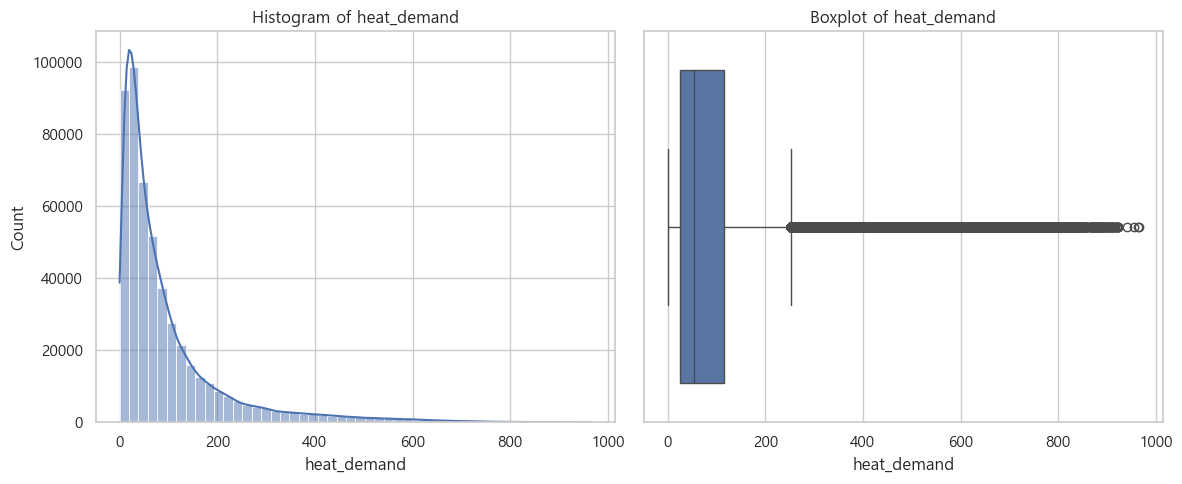

In [156]:
plt.figure(figsize=(12,5))

# 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(heat['heat_demand'].dropna(), bins=50, kde=True)
plt.title('Histogram of heat_demand')

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=heat['heat_demand'])
plt.title('Boxplot of heat_demand')

plt.tight_layout()
plt.show()


In [157]:
from scipy.stats import skew

skewness = skew(heat['heat_demand'].dropna())
print(f"heat_demand의 왜도: {skewness:.4f}")


heat_demand의 왜도: 2.5391


In [158]:
heat['heat_demand'].describe()

count    499301.000000
mean         95.867813
std         115.262792
min           0.000000
25%          25.000000
50%          55.000000
75%         116.000000
max         966.000000
Name: heat_demand, dtype: float64

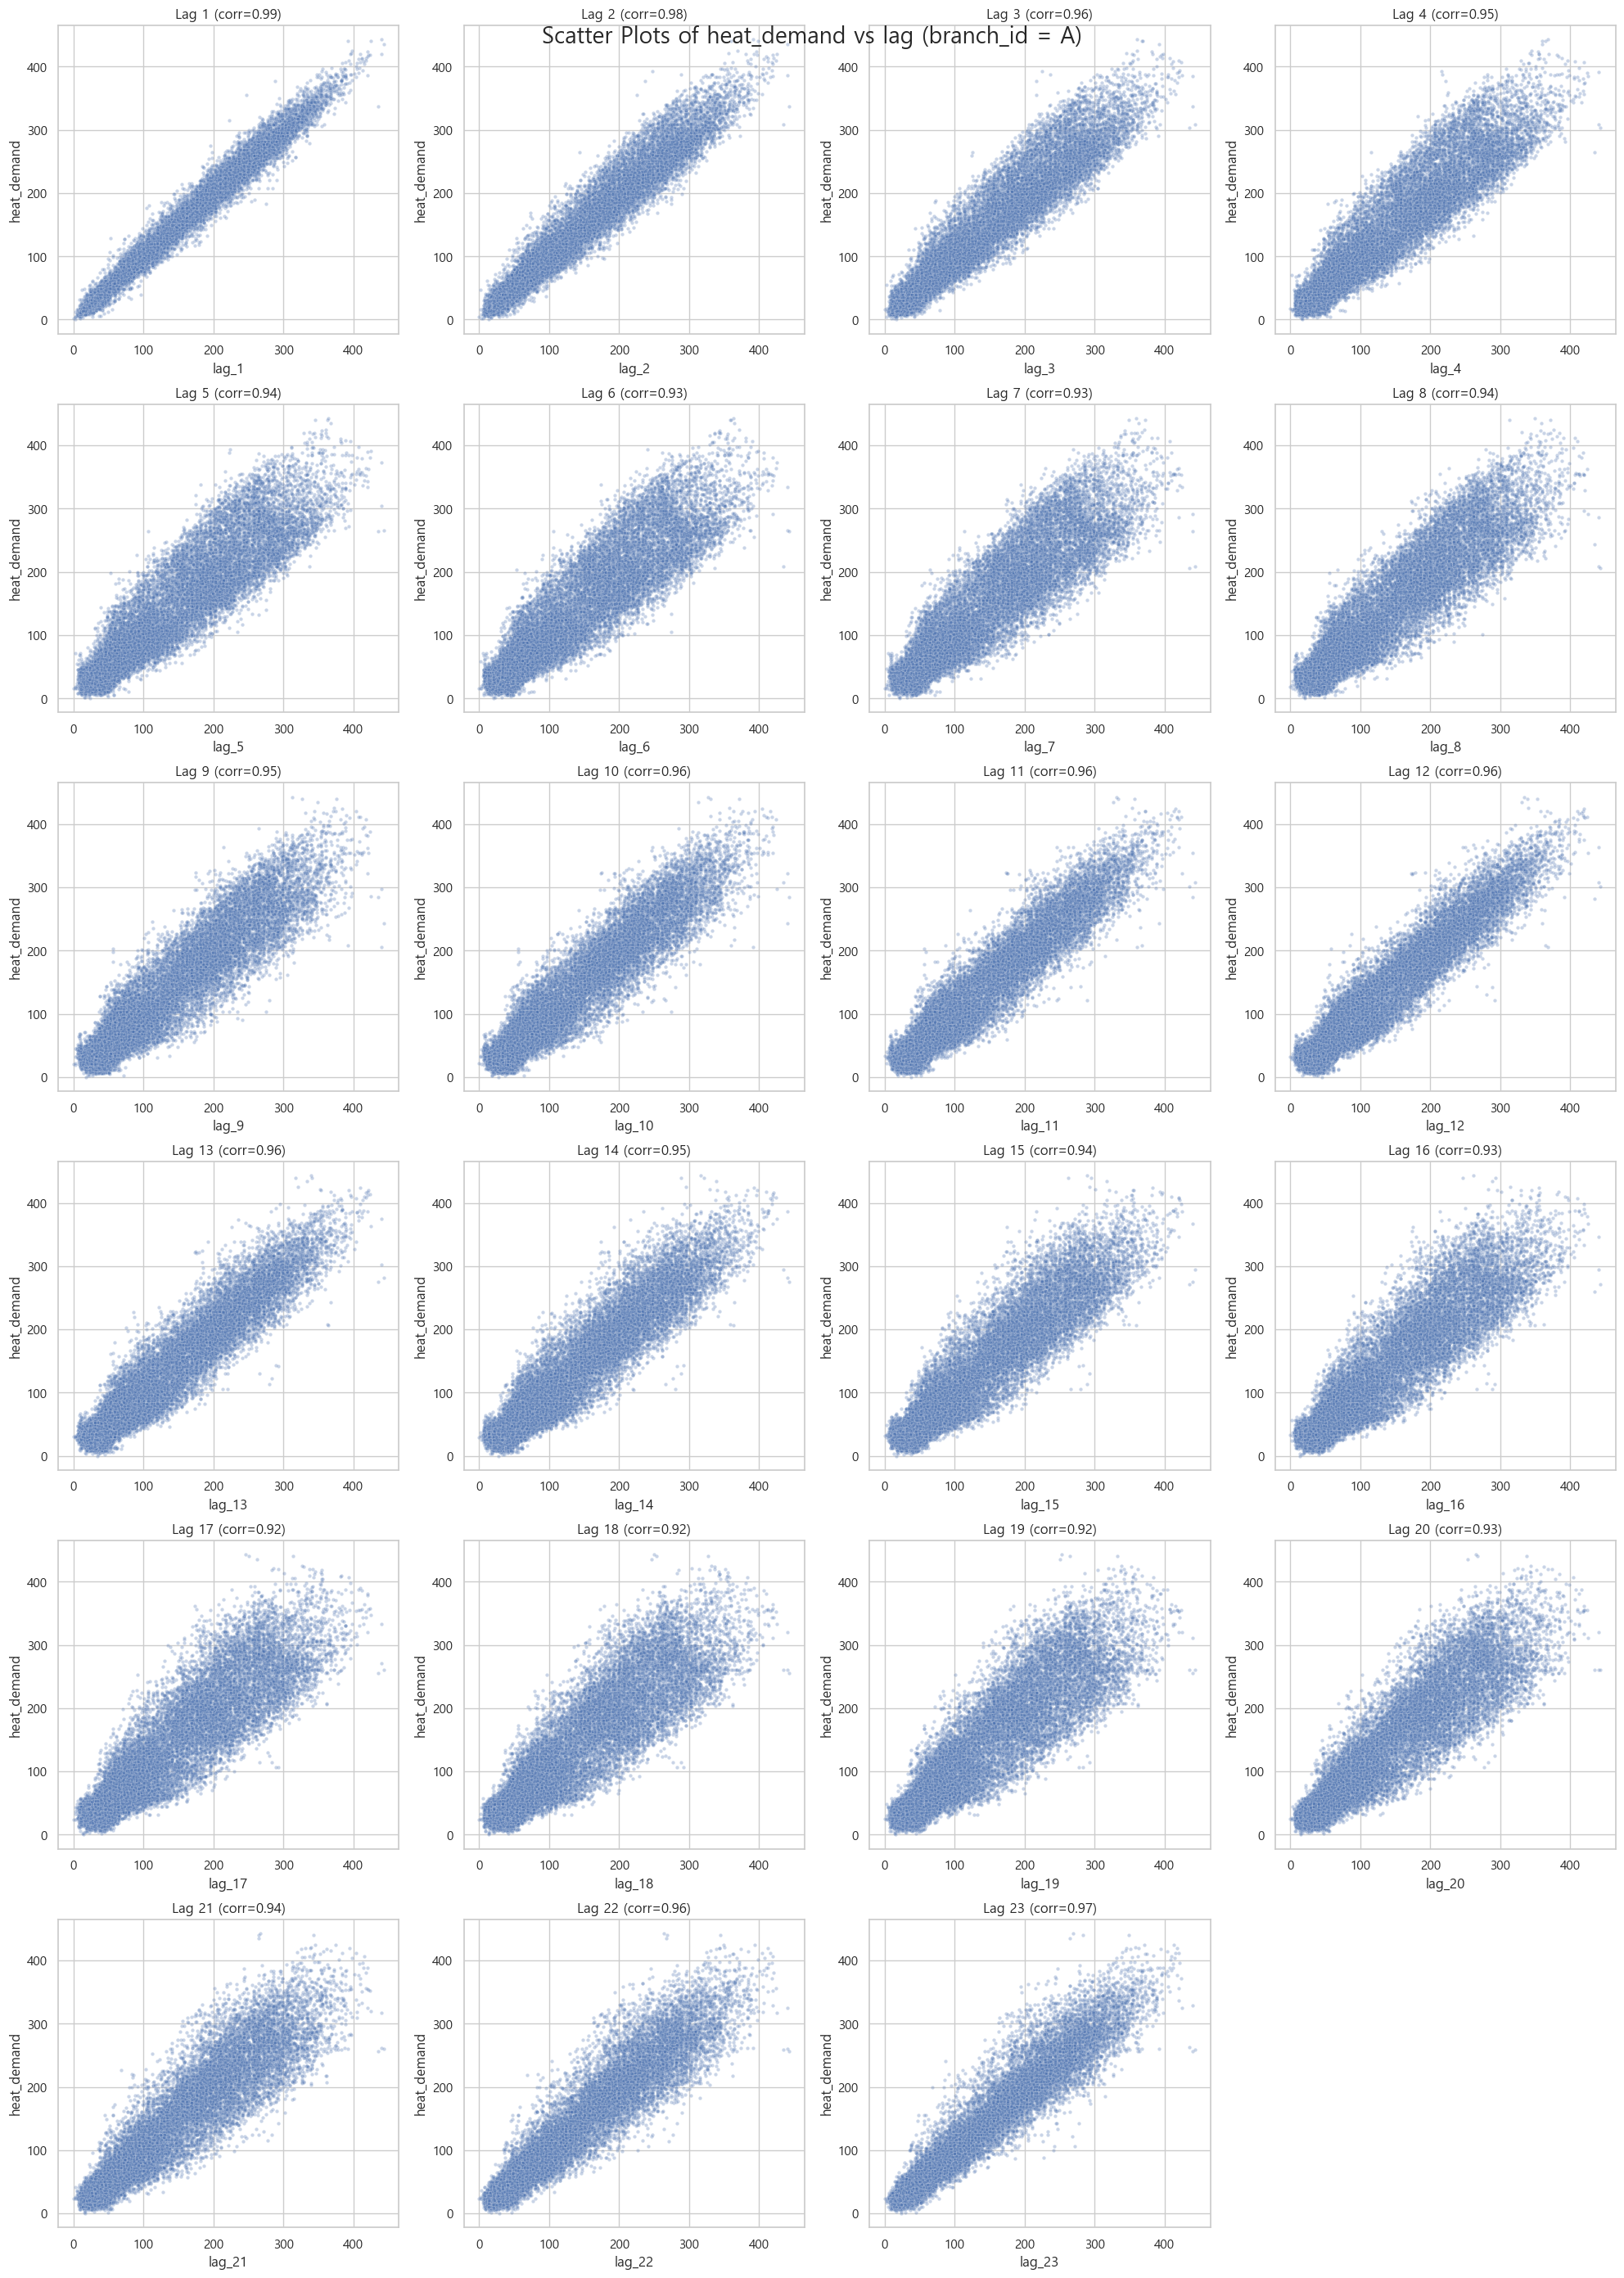

In [138]:

# branch_id == 'A' 필터링
heat_A = heat[heat['branch_id'] == 'A'].copy()

# 그래프 설정
plt.figure(figsize=(20, 30))
plt.suptitle('Scatter Plots of heat_demand vs lag (branch_id = A)', fontsize=20, y=0.92)

# 1~23 lag에 대해 반복
for lag in range(1, 24):
    heat_A[f'lag_{lag}'] = heat_A['heat_demand'].shift(lag)
    # 상관계수 계산 (dropna 필수)
    corr = heat_A[['heat_demand', f'lag_{lag}']].dropna().corr().iloc[0, 1]

    # subplot 위치 설정
    plt.subplot(6, 4, lag)  # 6행 4열 중 lag번째
    sns.scatterplot(
        data=heat_A, x=f'lag_{lag}', y='heat_demand',
        alpha=0.3, s=10
    )
    plt.title(f'Lag {lag} (corr={corr:.2f})')
    plt.xlabel(f'lag_{lag}')
    plt.ylabel('heat_demand')

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # suptitle과 겹치지 않게
plt.show()


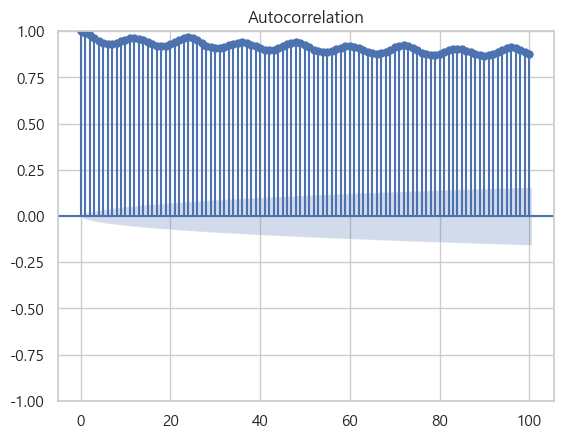

In [147]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시계열 데이터로 index 설정 (필요 시)
# heat_A = heat_A.set_index('tm')

# ACF 플롯
plot_acf(heat_A['heat_demand'].dropna(), lags=100)
plt.show()


### target 기준 결측치 정리


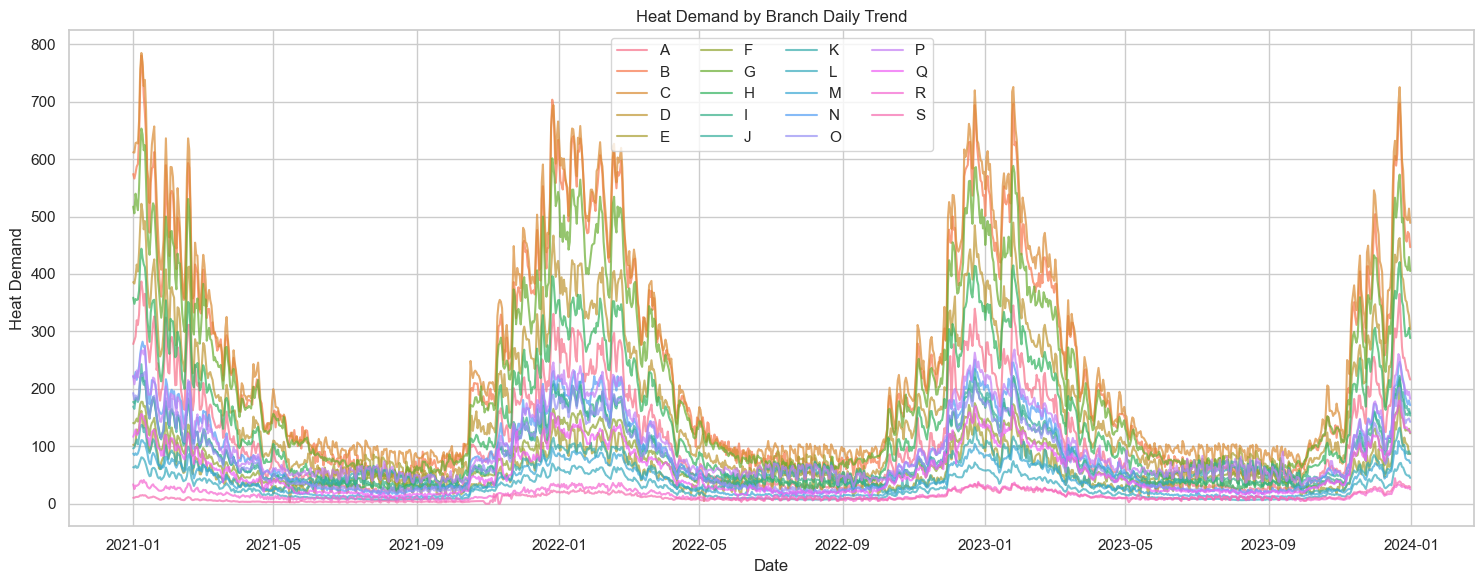

In [ ]:
# 브랜치별 일별 평균 추세

sns.set(style='whitegrid')
plt.figure(figsize=(15, 6))
sns.lineplot(data=daily, x='tm', y='heat_demand', hue='branch_id', alpha=0.7)
plt.title('Heat Demand by Branch Daily Trend')
plt.xlabel('Date')
plt.ylabel('Heat Demand')
plt.legend(ncol=4)
plt.tight_layout()
plt.show()


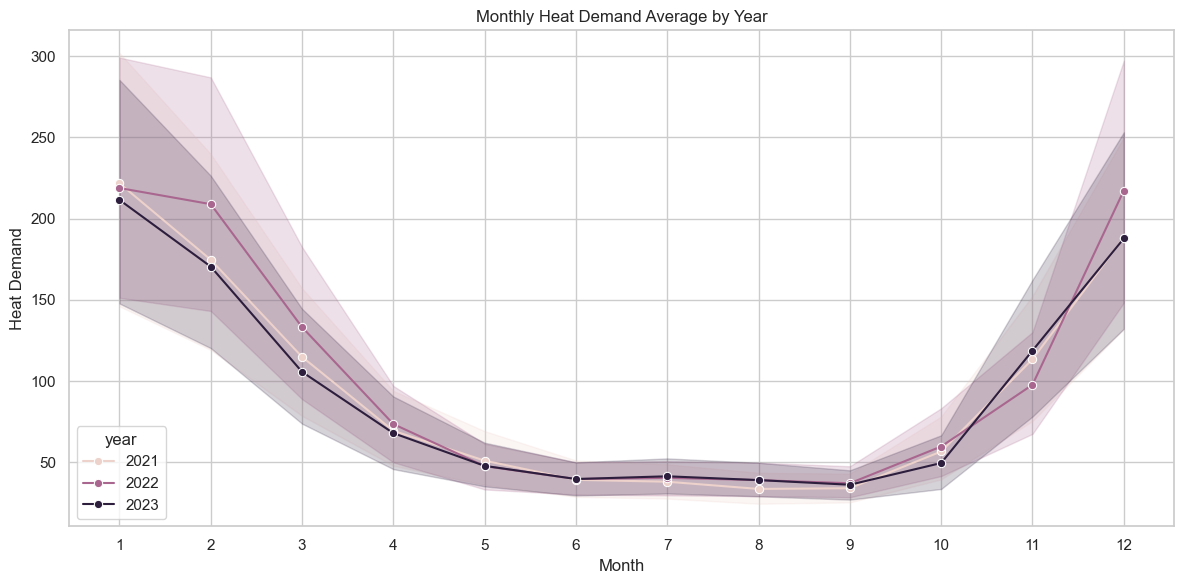

In [ ]:
# 연도-월별 평균 heat_demand 계산
monthly = heat.groupby(['year', 'month', 'branch_id'])['heat_demand'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly, x='month', y='heat_demand', hue='year', marker='o')

plt.title('Monthly Heat Demand Average by Year')
plt.xlabel('Month')
plt.ylabel('Heat Demand')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


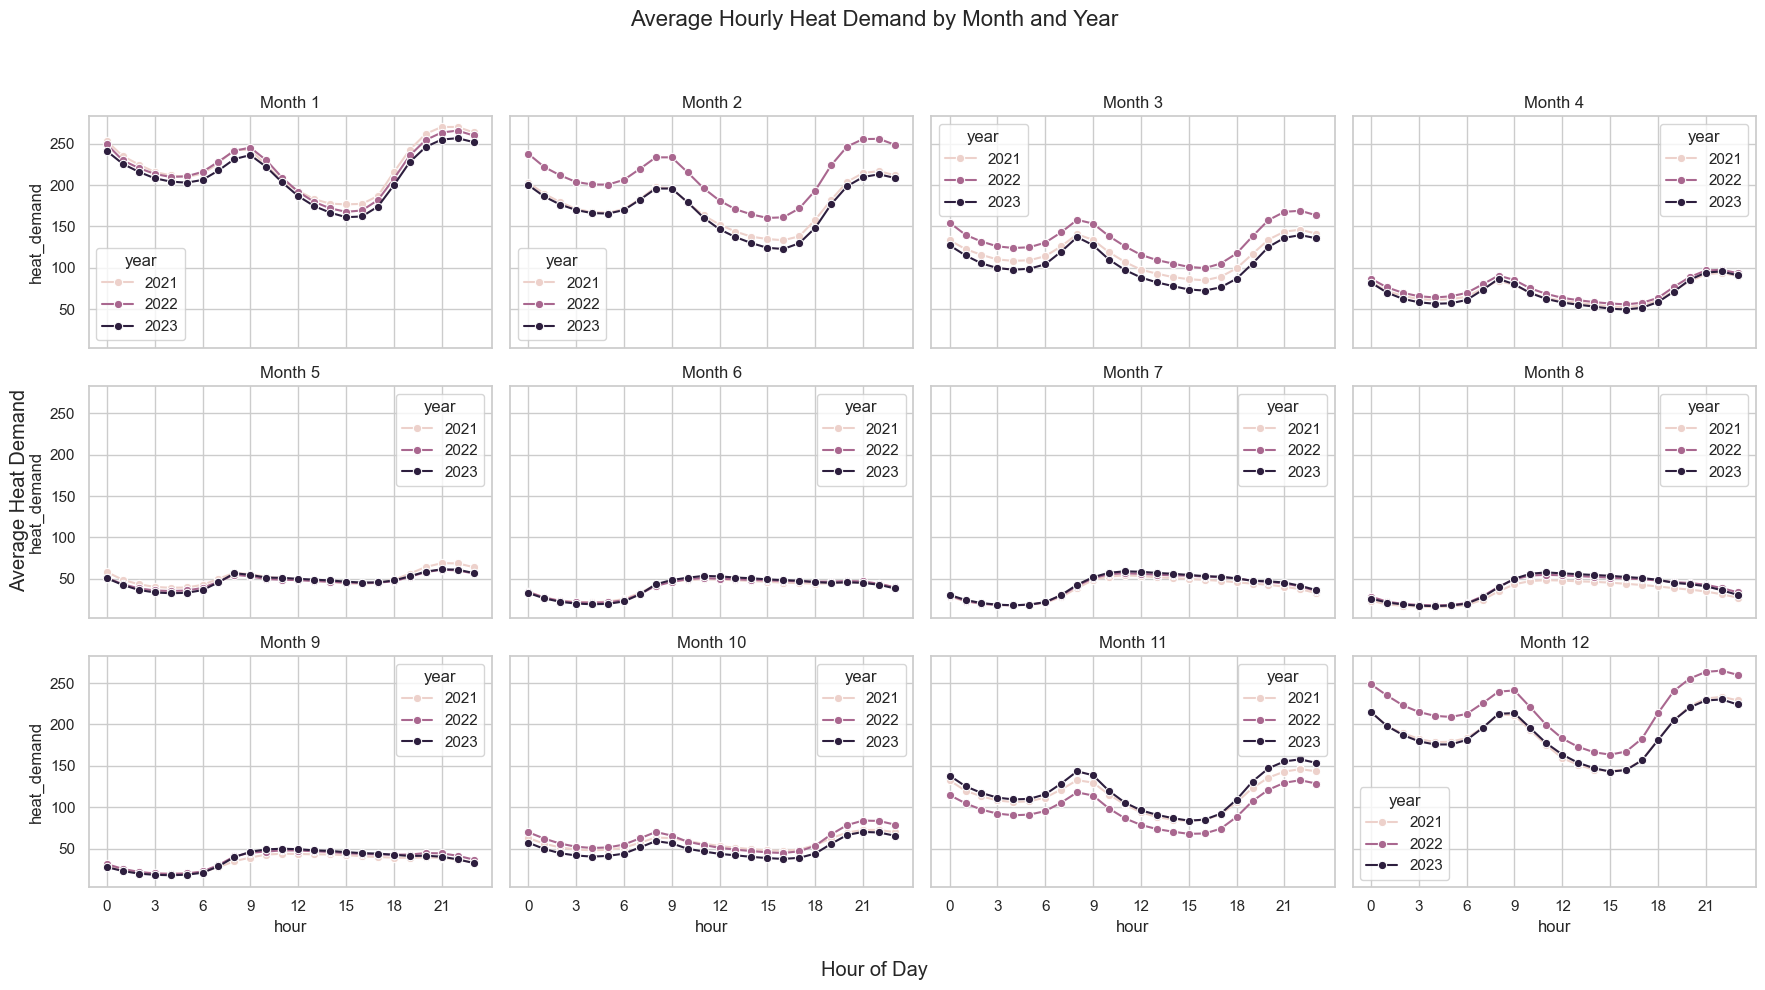

In [ ]:

# 월-시간-연도별 평균 열 수요 계산
hourly_month_year = (
    heat.groupby(['month', 'hour', 'year'])['heat_demand']
    .mean()
    .reset_index()
)

# 그래프 그리기
fig, axes = plt.subplots(3, 4, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month - 1]
    data = hourly_month_year[hourly_month_year['month'] == month]
    sns.lineplot(data=data, x='hour', y='heat_demand', hue='year', marker='o', ax=ax)

    ax.set_title(f'Month {month}')
    ax.set_xticks(range(0, 24, 3))
    ax.grid(True)

# 공통 제목과 축 라벨
fig.suptitle('Average Hourly Heat Demand by Month and Year', fontsize=16)
fig.supxlabel('Hour of Day')
fig.supylabel('Average Heat Demand')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


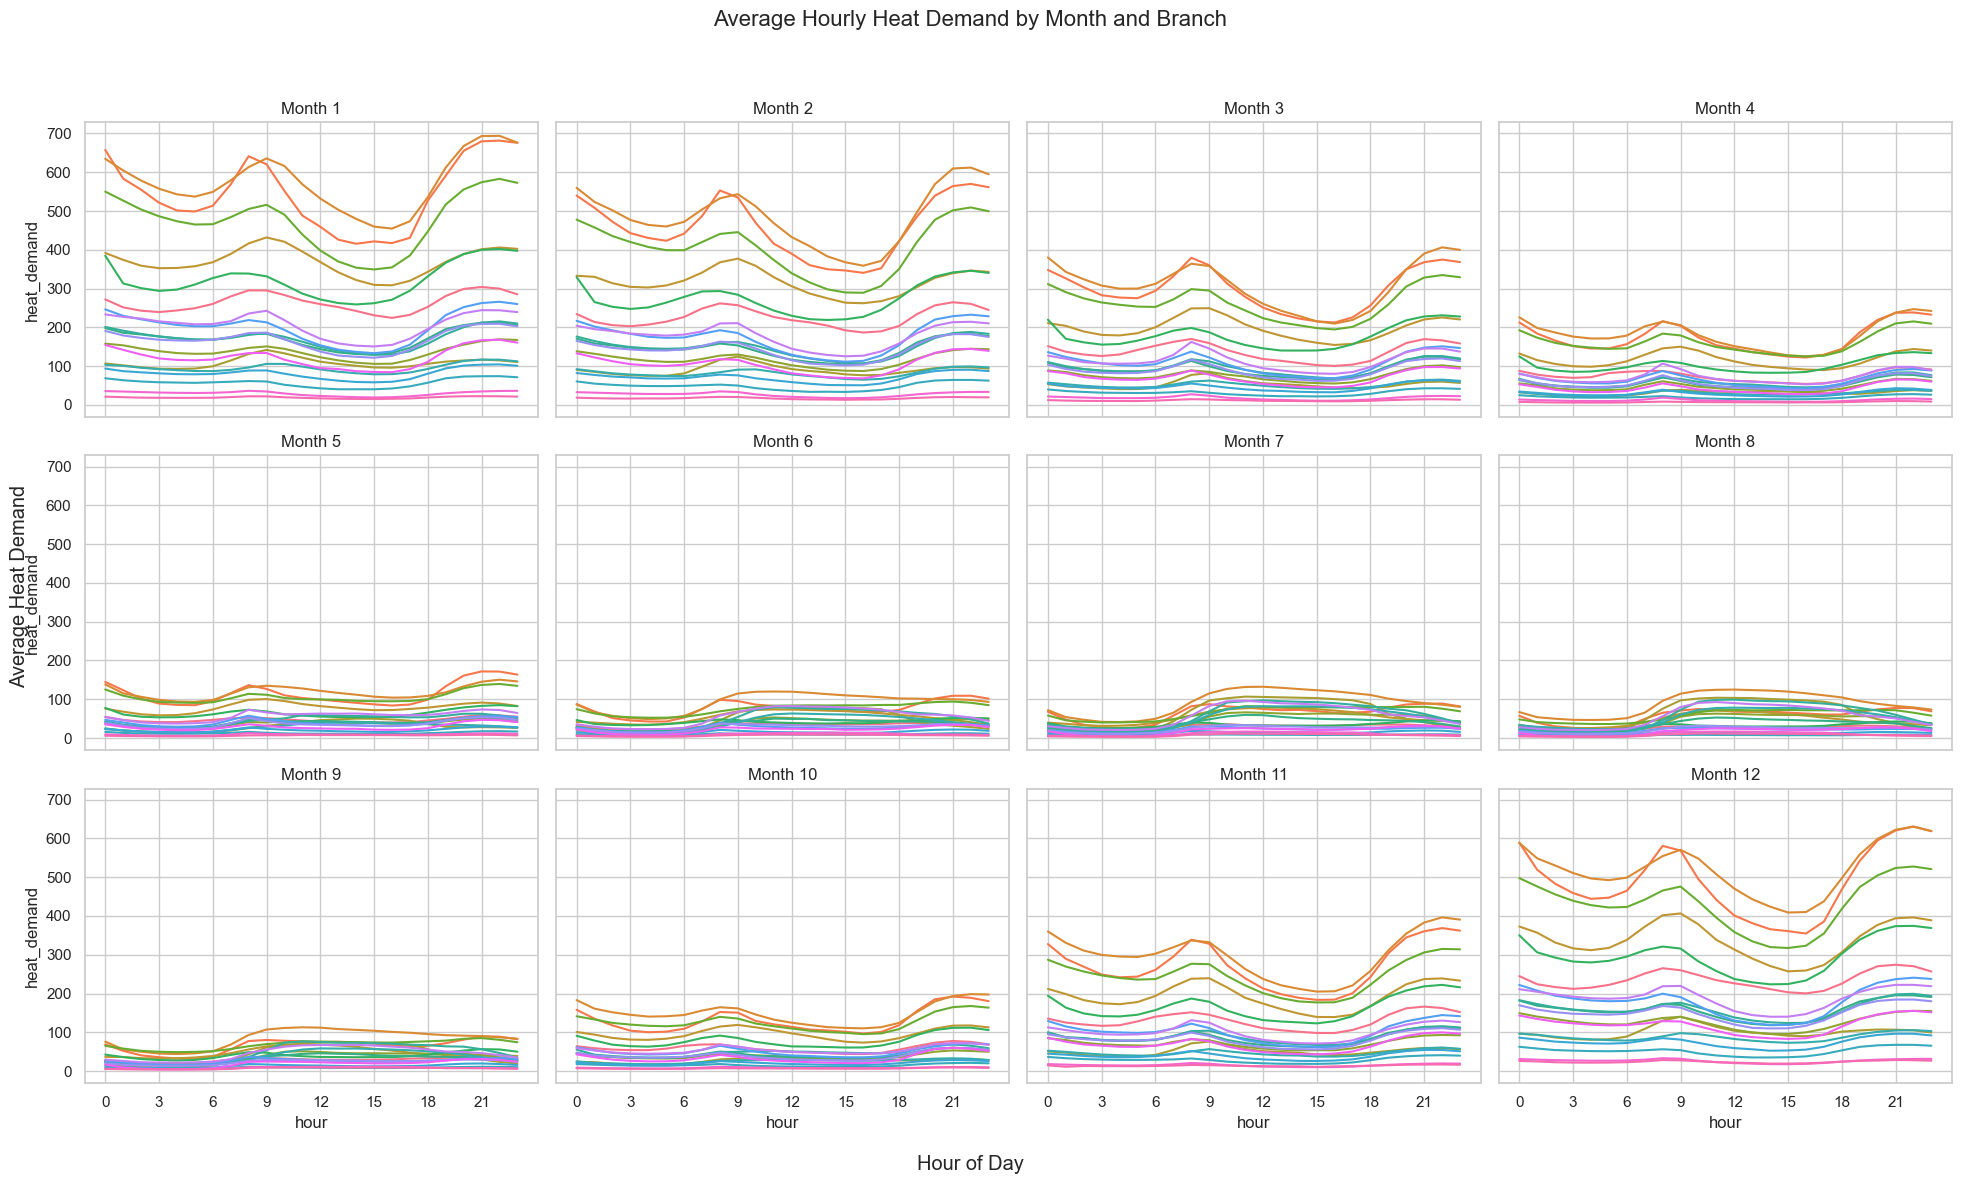

In [ ]:

# 월-시간-지점별 평균 열 수요 계산
hourly_month_branch = (
    heat.groupby(['month', 'hour', 'branch_id'])['heat_demand']
    .mean()
    .reset_index()
)

# 그래프 그리기
fig, axes = plt.subplots(3, 4, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month - 1]
    data = hourly_month_branch[hourly_month_branch['month'] == month]
    sns.lineplot(data=data, x='hour', y='heat_demand', hue='branch_id', ax=ax, legend=False)

    ax.set_title(f'Month {month}')
    ax.set_xticks(range(0, 24, 3))
    ax.grid(True)

# 공통 제목과 축 라벨
fig.suptitle('Average Hourly Heat Demand by Month and Branch', fontsize=16)
fig.supxlabel('Hour of Day')
fig.supylabel('Average Heat Demand')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


# 피처 하나씩 보기

## branch_id

In [ ]:
heat['branch_id'].nunique()
# 19개의 지사

19

In [ ]:
heat['branch_id'].value_counts()
# 관측값의 개수는 모두 같음.

branch_id
A    26279
B    26279
C    26279
D    26279
E    26279
F    26279
G    26279
H    26279
I    26279
J    26279
K    26279
L    26279
M    26279
N    26279
O    26279
P    26279
Q    26279
R    26279
S    26279
Name: count, dtype: int64

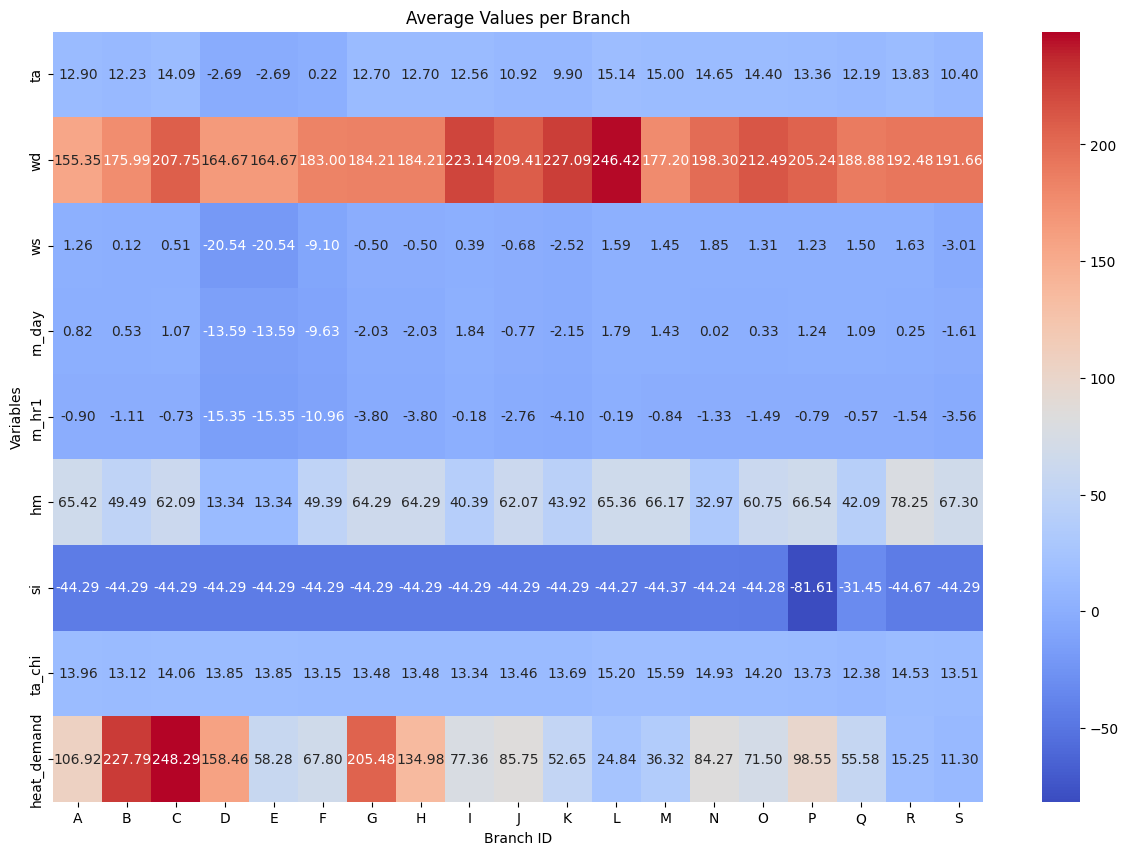

In [ ]:
# branch_id에 대한 나머지 수치형 데이터 평균값 확인

branch_mean = heat.groupby('branch_id').mean(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(branch_mean.T, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Average Values per Branch")
plt.xlabel("Branch ID")
plt.ylabel("Variables")
plt.show()


In [ ]:
from scipy.stats import f_oneway

groups = [group['heat_demand'] for name, group in heat.groupby('branch_id')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")


ANOVA F-statistic: 14671.508504394998, p-value: 0.0


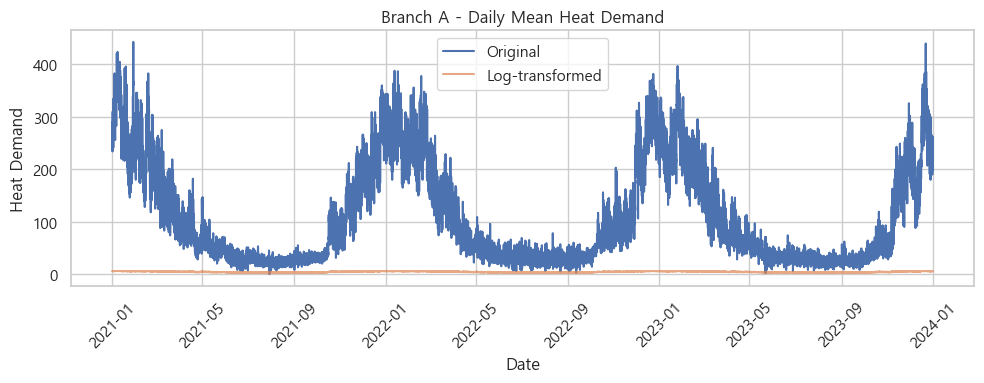

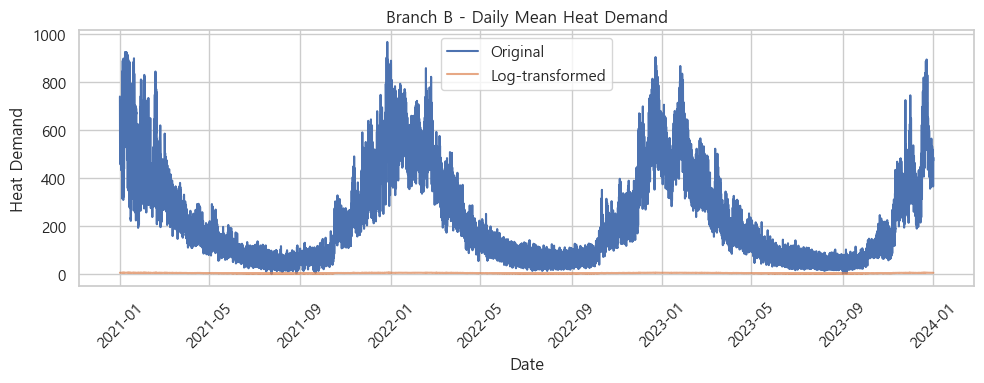

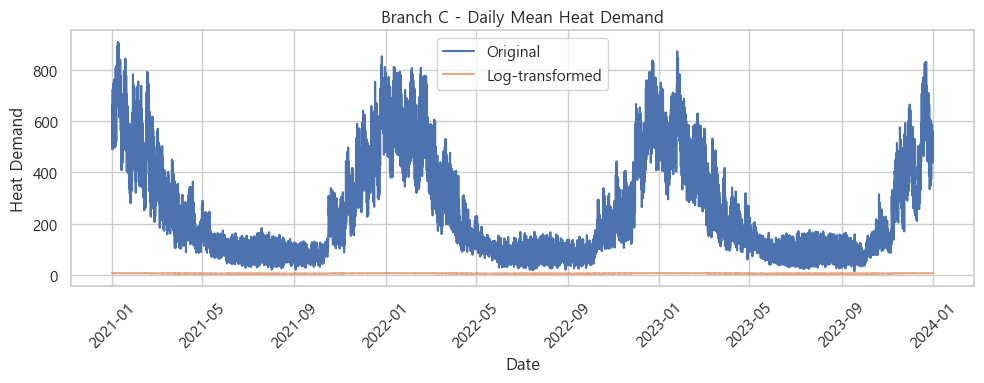

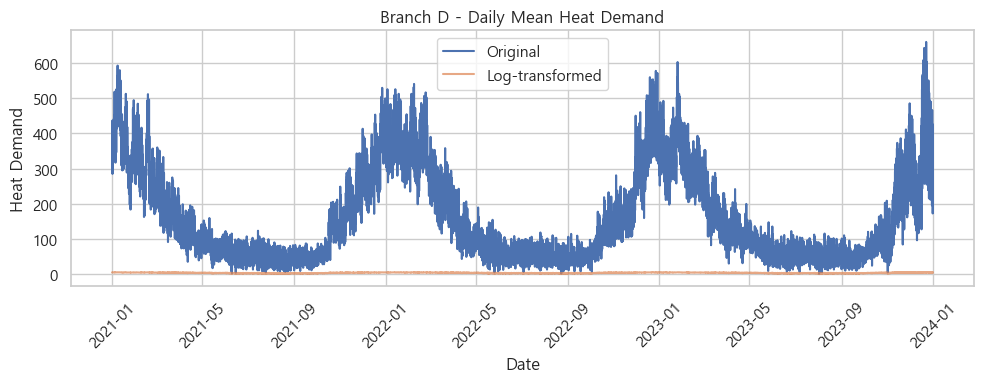

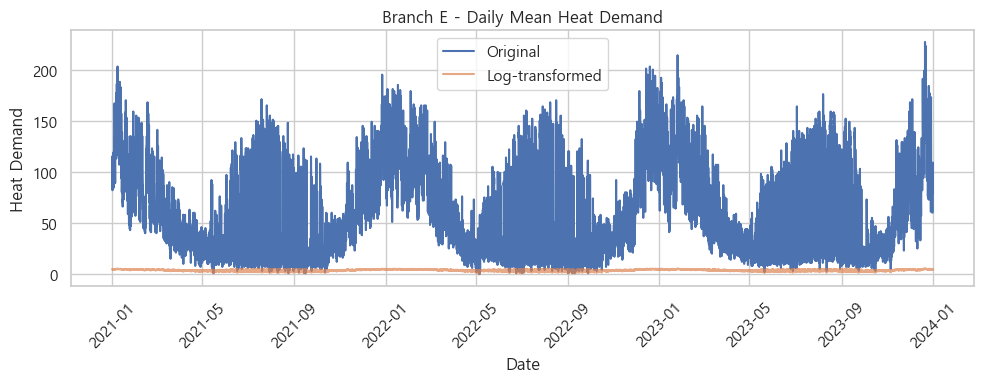

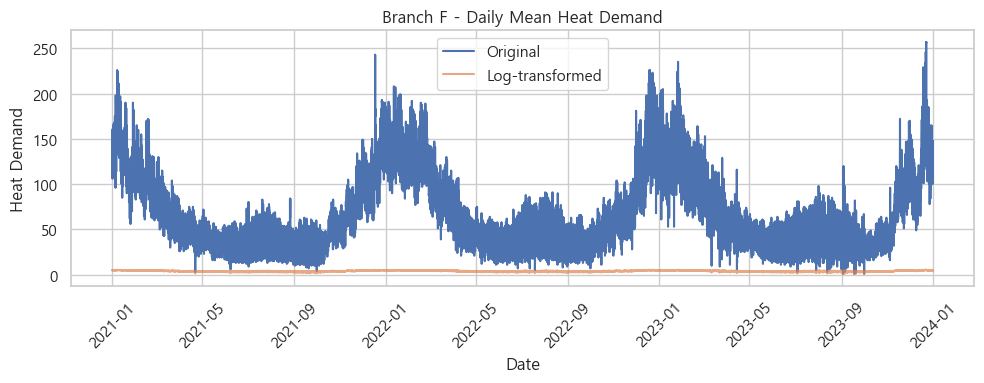

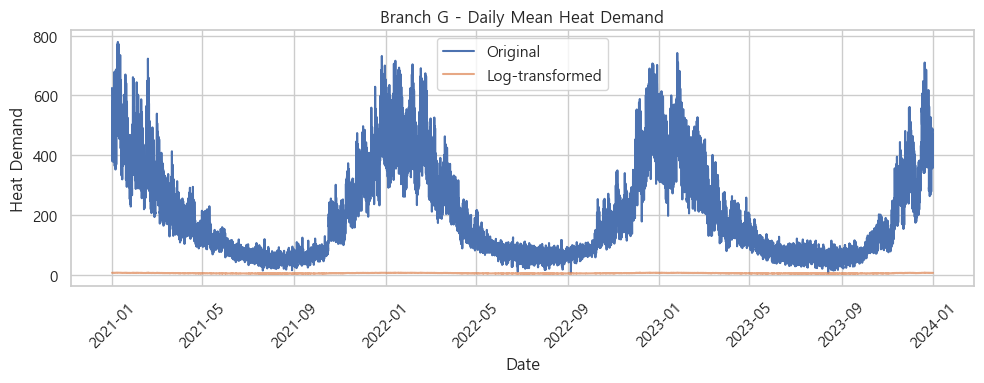

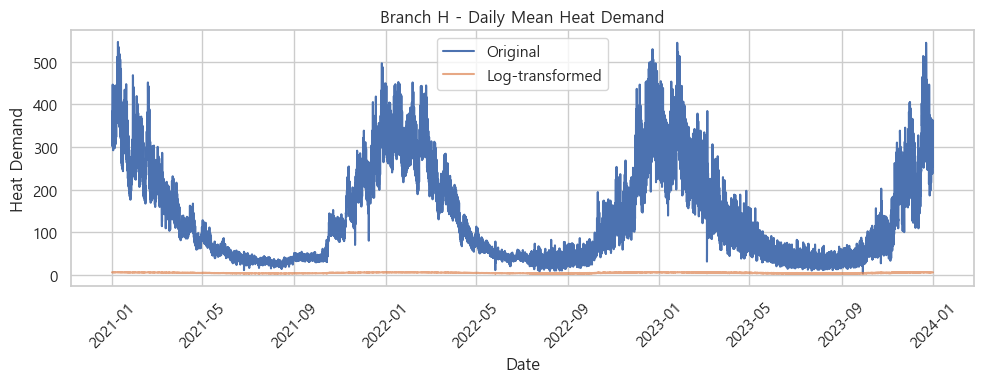

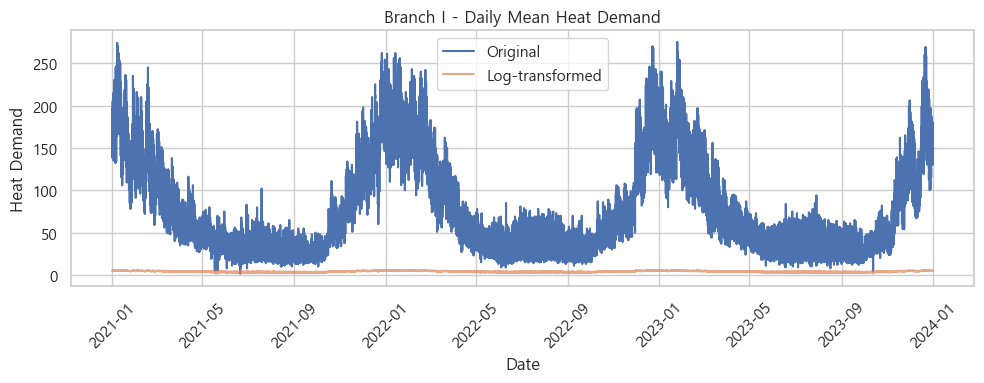

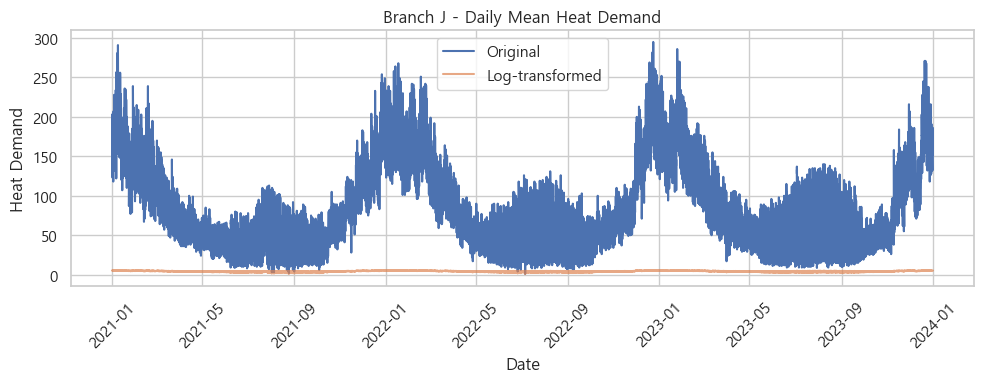

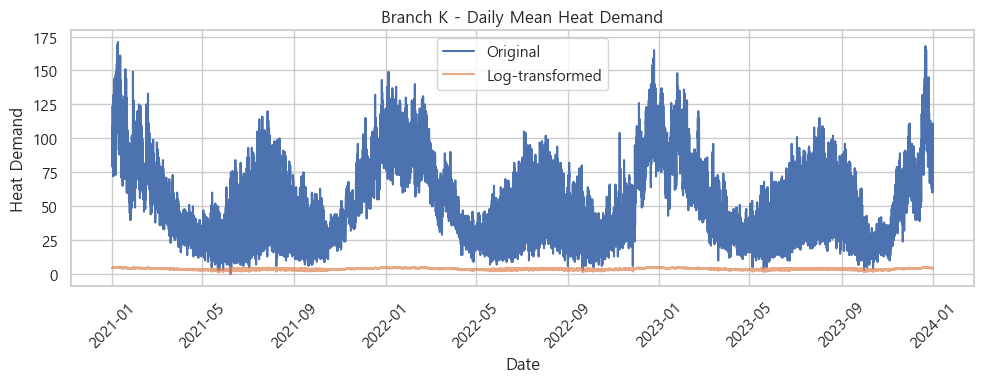

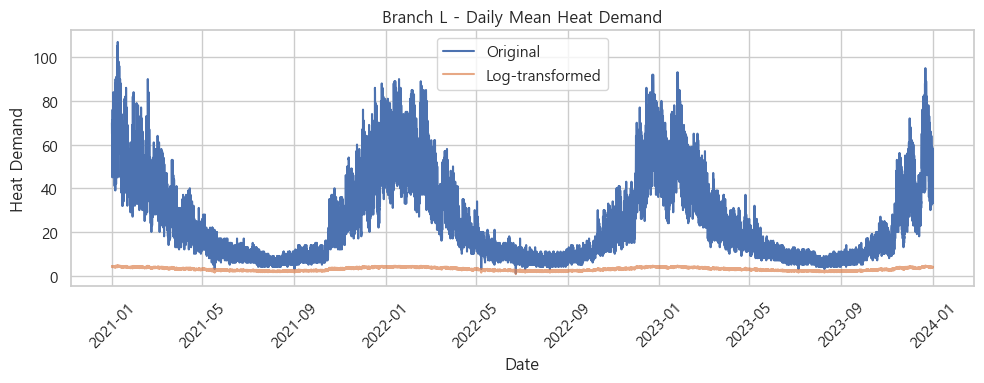

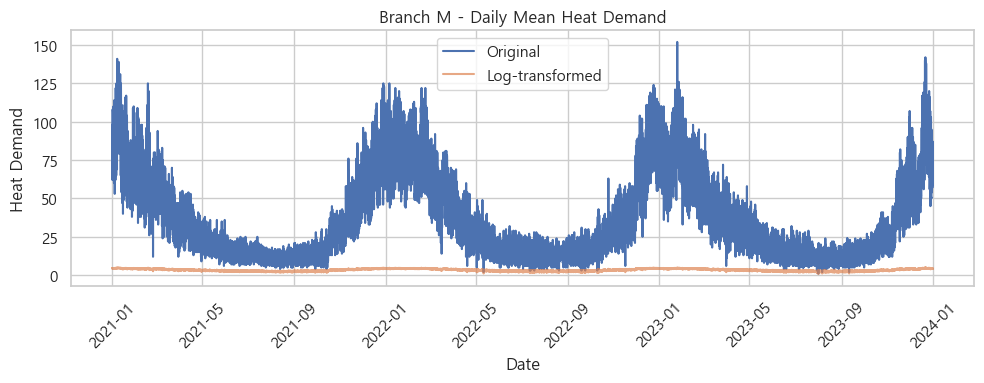

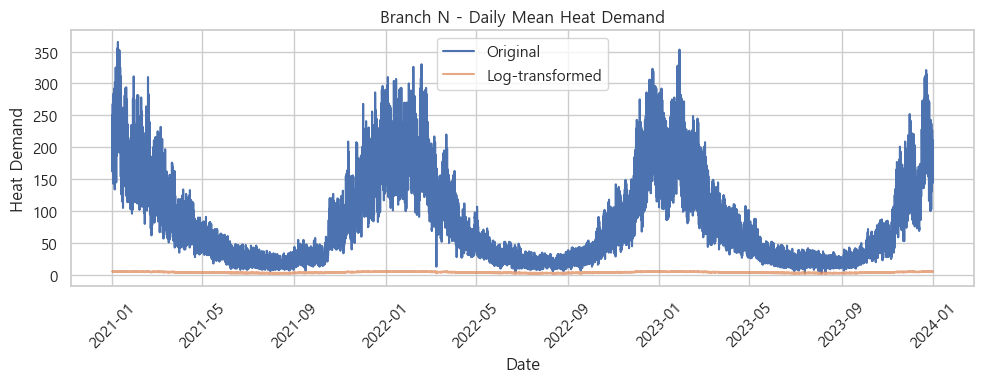

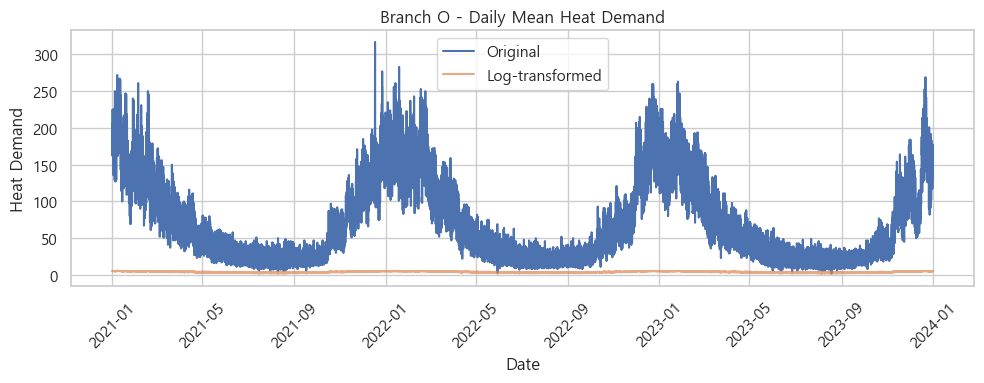

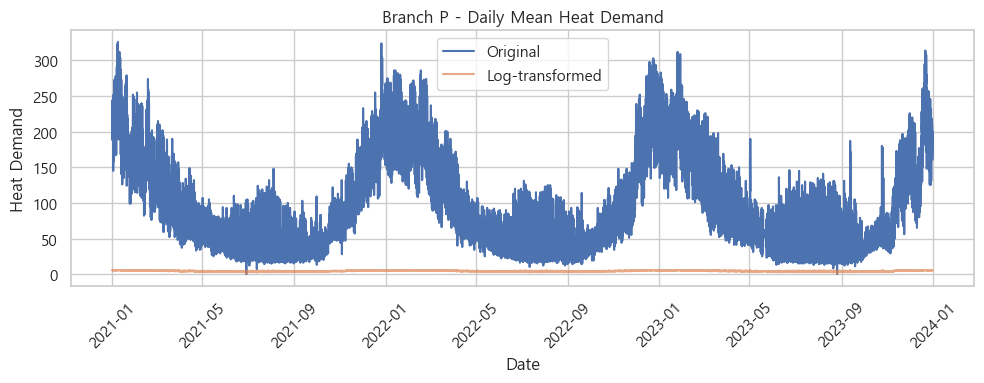

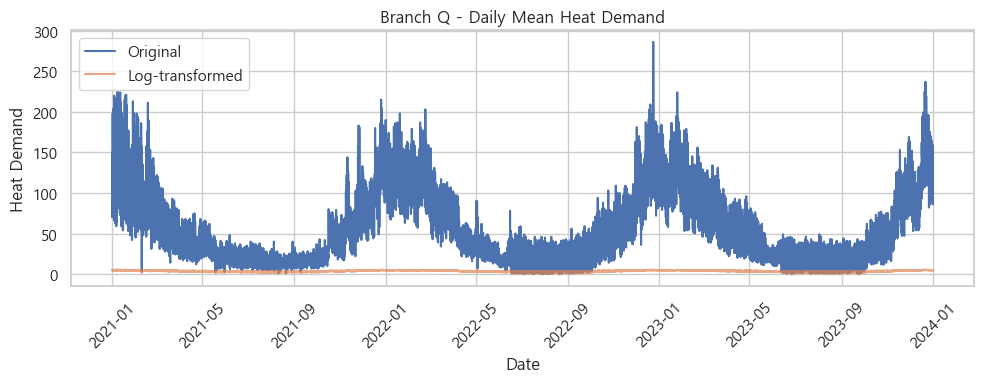

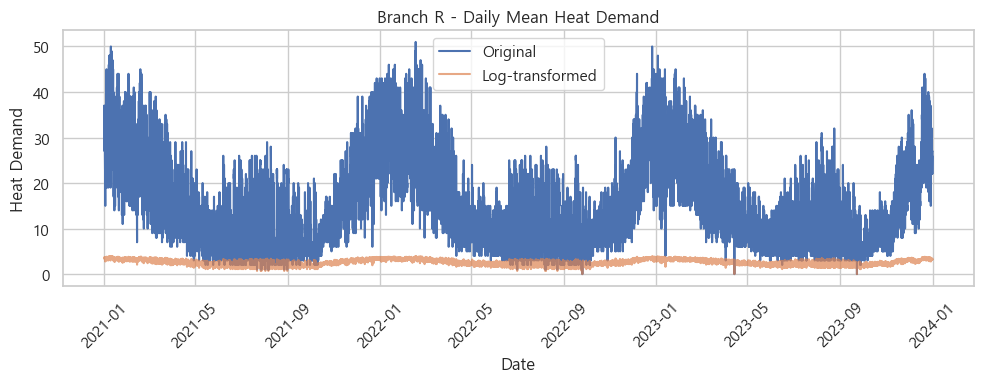

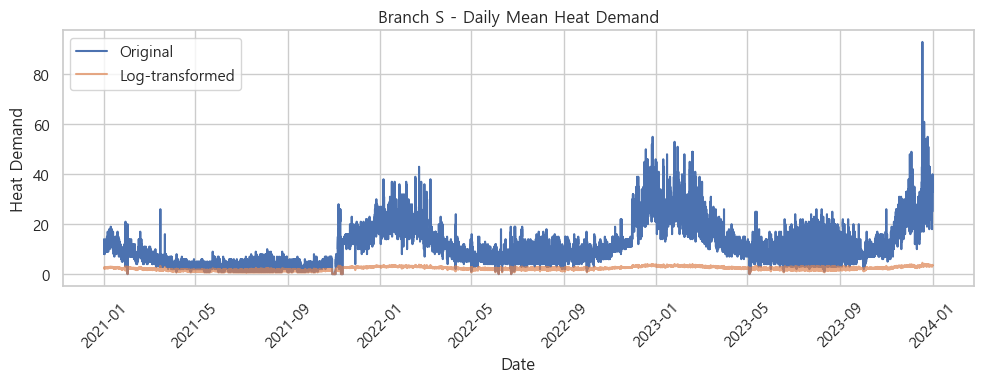

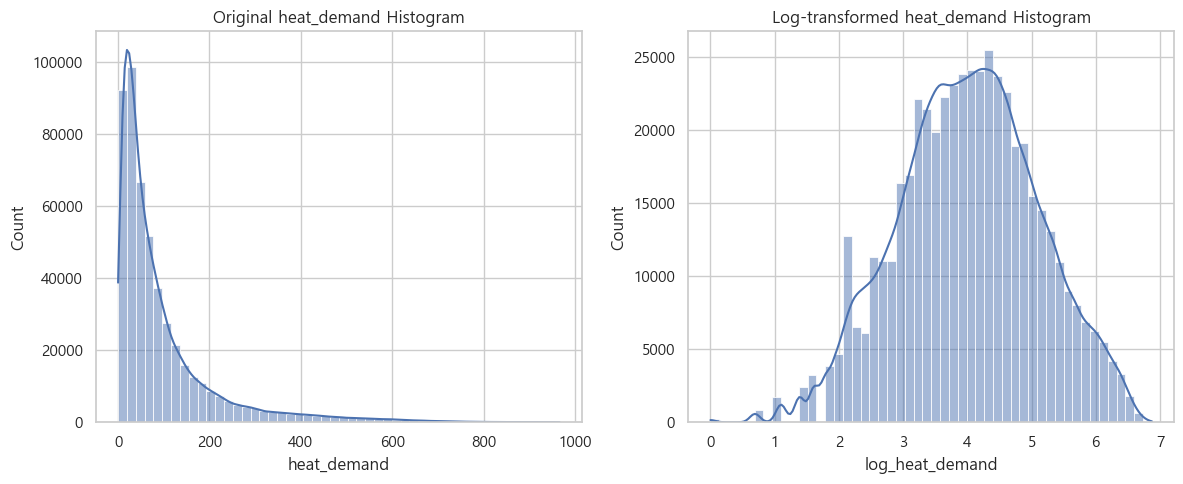

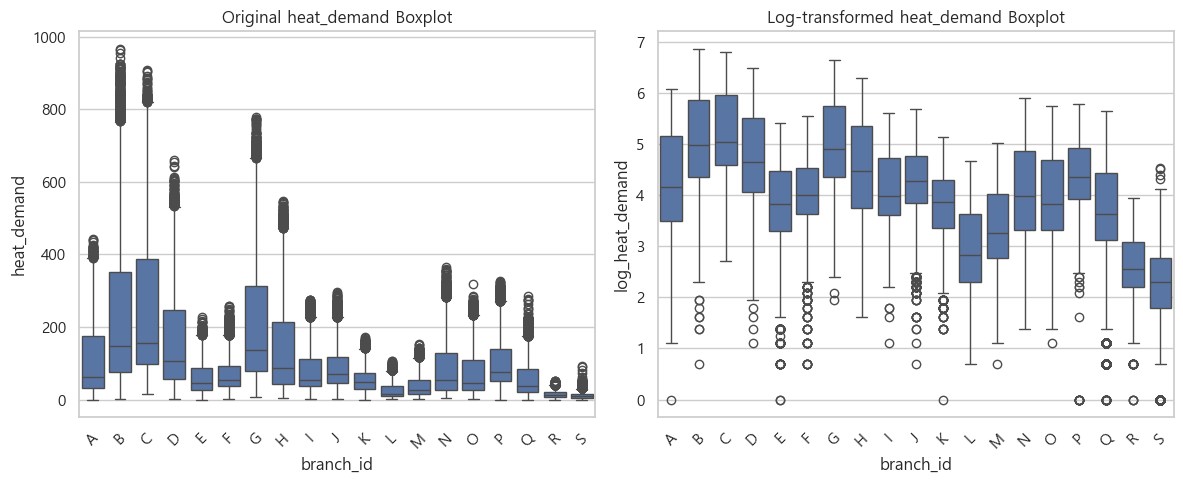

In [162]:

daily_avg = heat.groupby(['branch_id', 'tm'])['heat_demand'].mean().reset_index()

# 로그 변환 (0 이상 값만 가능하므로 작은 상수 더하기)
daily_avg['log_heat_demand'] = np.log1p(daily_avg['heat_demand'])

# 시각화
branches = daily_avg['branch_id'].unique()
n_branch = len(branches)

branches = daily_avg['branch_id'].unique()

# 지점별로 일별 평균 추세 플롯 (원본 vs 로그)
for b in branches:
    sub = daily_avg[daily_avg['branch_id'] == b]
    plt.figure(figsize=(10, 4))
    plt.plot(sub['tm'], sub['heat_demand'], label='Original')
    plt.plot(sub['tm'], sub['log_heat_demand'], label='Log-transformed', alpha=0.7)
    plt.title(f'Branch {b} - Daily Mean Heat Demand')
    plt.xlabel('Date')
    plt.ylabel('Heat Demand')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 히스토그램
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(daily_avg['heat_demand'], bins=50, kde=True)
plt.title('Original heat_demand Histogram')

plt.subplot(1, 2, 2)
sns.histplot(daily_avg['log_heat_demand'], bins=50, kde=True)
plt.title('Log-transformed heat_demand Histogram')
plt.tight_layout()
plt.show()

# 박스플롯
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=daily_avg, x='branch_id', y='heat_demand')
plt.title('Original heat_demand Boxplot')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=daily_avg, x='branch_id', y='log_heat_demand')
plt.title('Log-transformed heat_demand Boxplot')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
